In [57]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [120]:
df = pd.read_excel('../data/BW.xlsx')

In [121]:
df = df.melt(id_vars=df.columns[:-2], value_vars=df.columns[-2:], var_name='Treatment')
df.Treatment = df.Treatment.str.title()

In [123]:
df.Drug = df.Drug.astype('category').cat.reorder_categories(['Vehicle', 'ABT-263', 'Venetoclax', 'P Bcl2', 'P Bcl-xL'])

In [125]:
drug_map = dict(zip(df.Drug.unique(), ['AB','V','P Bcl2','P Bcl-xL','Veh']))

In [127]:
df.Drug = df.Drug.map(drug_map)

/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_21567/502623730.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=df, x='Drug', y='value', hue='Treatment', size=5, dodge=True, ax=ax, legend=False, color="black",


Text(0, 0.5, 'Body Weight (g)')

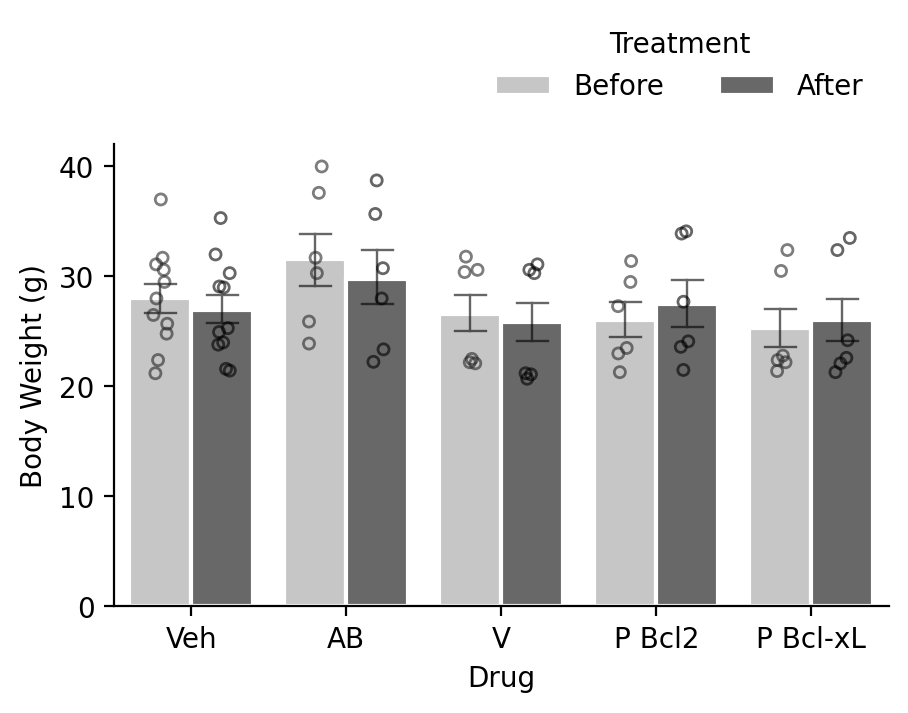

In [128]:
import seaborn.objects as so
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=df, x='Drug', y='value', hue='Treatment', ax=ax, 
            errorbar=("ci", 68), capsize=.4, linewidth=1.5,
            palette="Greys",
            err_kws={"color": "k", "linewidth": 0.85, 'alpha': 0.6},
            edgecolor="w",
            dodge=True)
sns.stripplot(data=df, x='Drug', y='value', hue='Treatment', size=5, dodge=True, ax=ax, legend=False, color="black",
              marker="$\circ$", edgecolor="k", alpha=0.6)

ax.legend(title='Treatment', loc='upper right', bbox_to_anchor=(1, 1.3), frameon=False, ncols=2)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.set_ylabel('Body Weight (g)')


In [130]:
test = df.groupby('Drug',observed=False).apply(lambda x: stats.ttest_ind(x.loc[x.Treatment == 'Before', 'value'],
                                                                         x.loc[x.Treatment == 'After', 'value']).pvalue
                                               ).pipe(multipletests, method='bonferroni')[1]
test

/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_21567/2861701300.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test = df.groupby('Drug',observed=False).apply(lambda x: stats.ttest_ind(x.loc[x.Treatment == 'Before', 'value'],


array([1., 1., 1., 1., 1.])

In [131]:
cmap = {'Veh': '#000000',
 'AB': '#a9a9a9',
 'V': '#a9a9a9',
 'P Bcl2': '#f08080',
 'P Bcl-xL': '#f08080'}

In [132]:
# define a function to calculate the min and max of the SEM
def cal_sem(x:np.array):
    return np.mean(x) - stats.sem(x, nan_policy='omit'), np.mean(x) + stats.sem(x, nan_policy='omit')

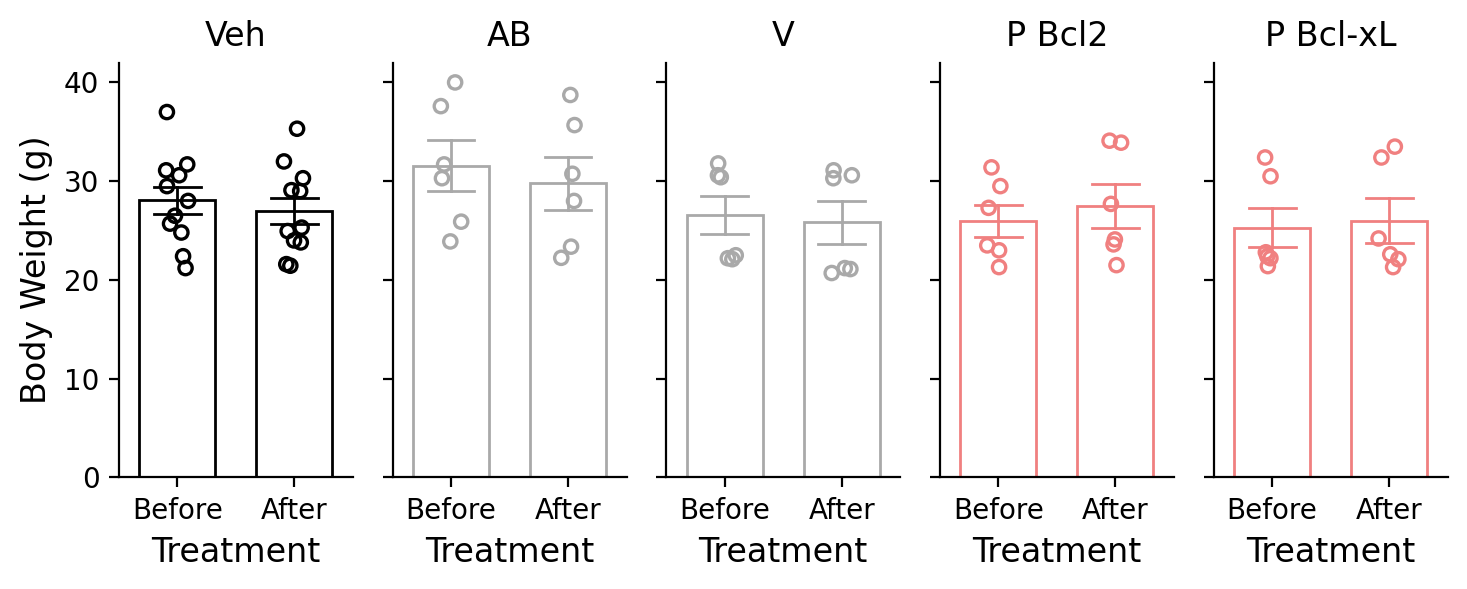

In [141]:
g = sns.catplot(
    df, kind="bar",
    x="Treatment", y="value", col="Drug",
    palette=cmap, hue="Drug",
    height=3, aspect=.5, width=0.65,
    fill=False, linewidth=1,
    errorbar=cal_sem, capsize=.4,
    err_kws={"linewidth": 1})
g.map_dataframe(sns.stripplot, x="Treatment", y="value", color="black", size=6, marker="$\circ$", 
                hue='Drug',palette=cmap, zorder=1)
g.set_titles(col_template="{col_name}", size=12)
g.set_ylabels('Body Weight (g)', size=12)
g.set_xlabels('Treatment', size=12)
g.legend.remove()
g.fig.savefig('BW.pdf', dpi=300, bbox_inches='tight')